<a href="https://colab.research.google.com/github/aldodec/Neural_Networks/blob/master/CIFAR_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
## It has 3 color channels.

In [ ]:
random_image = X_train[0]
random_image.shape

(32, 32, 3)

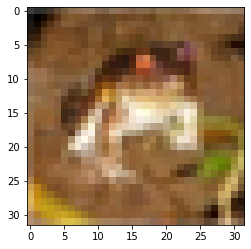

In [ ]:
plt.imshow(random_image)

In [ ]:
## Reescaling

In [ ]:
X_train = X_train/255 ## Division happens across all channels.
X_test = X_test/255

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [ ]:
# Building the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit(X_train,y_cat_train,epochs=15,validation_data=(X_test,y_cat_test),callbacks=[early_stopping])

Epoch 1/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4973 - accuracy: 0.4585 - val_loss: 1.2654 - val_accuracy: 0.5464
Epoch 2/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1706 - accuracy: 0.5874 - val_loss: 1.1399 - val_accuracy: 0.5971
Epoch 3/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0092 - accuracy: 0.6488 - val_loss: 1.0317 - val_accuracy: 0.6455
Epoch 4/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9006 - accuracy: 0.6854 - val_loss: 0.9922 - val_accuracy: 0.6562
Epoch 5/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8077 - accuracy: 0.7174 - val_loss: 0.9632 - val_accuracy: 0.6689
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7296 - accuracy: 0.7453 - val_loss: 0.9721 - val_accuracy: 0.6747
Epoch 7/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6607 - accuracy: 0.7693 - val_loss: 0.9761 - val_accuracy:

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.497330,0.45848,1.265437,0.5464
1,1.170618,0.58736,1.139879,0.5971
2,1.009196,0.64878,1.031691,0.6455
3,0.900565,0.68544,0.992166,0.6562
4,0.807717,0.71742,0.963229,0.6689
5,0.729608,0.74534,0.972123,0.6747
6,0.660681,0.76932,0.976111,0.6825


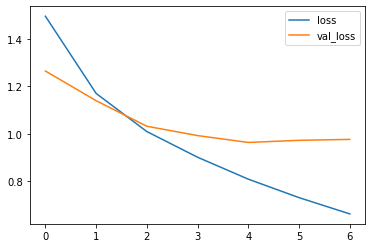

In [ ]:
metrics[['loss','val_loss']].plot()

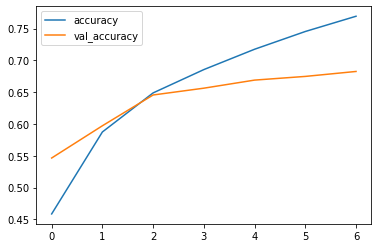

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
model.evaluate(X_test,y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9761 - accuracy: 0.6825


[0.9761112332344055, 0.6825000047683716]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_test_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1000
           1       0.82      0.78      0.80      1000
           2       0.67      0.53      0.59      1000
           3       0.59      0.34      0.43      1000
           4       0.57      0.72      0.64      1000
           5       0.54      0.64      0.59      1000
           6       0.80      0.74      0.77      1000
           7       0.74      0.74      0.74      1000
           8       0.79      0.77      0.78      1000
           9       0.62      0.87      0.72      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

[[693  26  45  10  25   9   8  10  91  83]
 [ 14 775   4   1   4  10  10   7  24 151]
 [ 63  10 529  30 135  99  55  34  14  31]
 [ 25  17  49 341 115 265  52  53  17  66]
 [ 23   5  54  19 720  50  22  69  17  21]
 [ 12   4  41  97  73 640 

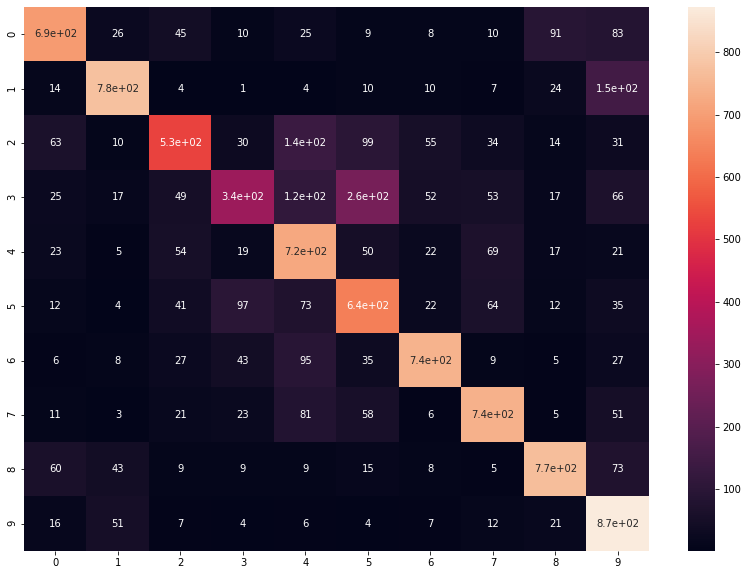

In [ ]:
import seaborn as sns

plt.figure(figsize=(14,10))
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)

In [ ]:
random_image = X_test[0]

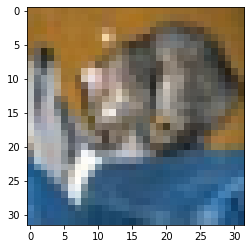

In [ ]:
plt.imshow(random_image)

In [ ]:
model.predict_classes(random_image.reshape(1,32,32,3))

array([3])

In [ ]:
y_test[0] == model.predict_classes(random_image.reshape(1,32,32,3))

array([ True])